In [30]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [31]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 'monospace': ['Computer Modern Typewriter']})
rc('text', usetex=True)
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

In [32]:
import math
import numpy as np
from scipy.fft import fft2
import scipy.stats as stats

from package.analysis import ft
from package.helpers import test_lens, test_physical_lens
from package.plots import plot

In [33]:
figure_dir = os.path.join(repo_path, 'figures', 'diagnostics', 'pixel_density_test')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

In [34]:
one = np.load(os.path.join(array_dir, 'detector_1.npy'))
three = np.load(os.path.join(array_dir, 'detector_3.npy'))
five = np.load(os.path.join(array_dir, 'detector_5.npy'))
seven = np.load(os.path.join(array_dir, 'detector_7.npy'))
nine = np.load(os.path.join(array_dir, 'detector_9.npy'))

image = nine

[Source](https://stackoverflow.com/questions/54410356/plot-the-psd-of-an-image-vs-x-y-axis)

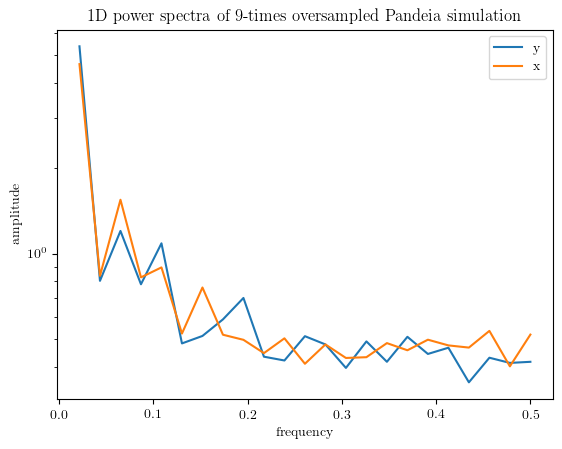

In [35]:
# Fourier Transform along the first axis

# TODO get into the right units of inverse arcseconds

# Round up the size along this axis to an even number
n = int( math.ceil(image.shape[0] / 2.) * 2 )

# We use rfft since we are processing real values
y = np.fft.rfft(image,n, axis=0)

# Sum power along the second axis
y = y.real*y.real + y.imag*y.imag
y = y.sum(axis=1)/y.shape[1]

# Generate a list of frequencies
fy = np.fft.rfftfreq(n)

# Graph it
plt.plot(fy[1:],y[1:], label ='y')

# Fourier Transform along the second axis

# Same steps as above
n = int( math.ceil(image.shape[1] / 2.) * 2 )

x = np.fft.rfft(image,n,axis=1)

x = x.real*x.real + x.imag*x.imag
x = x.sum(axis=0)/x.shape[0]

fx = np.fft.rfftfreq(n)

plt.plot(fx[1:],x[1:], label='x')

plt.title('1D power spectra of 9-times oversampled Pandeia simulation')
plt.ylabel('amplitude')
plt.xlabel('frequency')
plt.yscale('log')
plt.legend()

plt.show()

[Source](https://bertvandenbroucke.netlify.app/2019/05/24/computing-a-power-spectrum-in-python/)

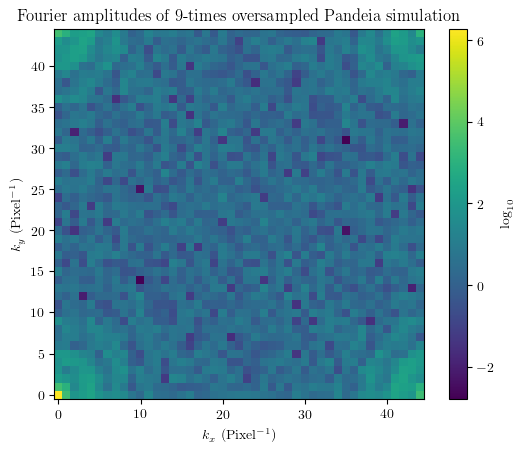

In [36]:
npix = image.shape[0]

fourier_image = np.fft.fftn(image)
fourier_amplitudes = np.abs(fourier_image)**2

plt.imshow(np.log10(fourier_amplitudes))
plt.title('Fourier amplitudes of 9-times oversampled Pandeia simulation')
plt.xlabel('$k_x$ (Pixel$^{-1}$)')
plt.ylabel('$k_y$ (Pixel$^{-1}$)')
cbar = plt.colorbar()
cbar.set_label('$\log_{10}$')
plt.show()

In [37]:
kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

In [38]:
knrm = knrm.flatten()
fourier_amplitudes_flat = fourier_amplitudes.flatten()

In [39]:
kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes_flat,
                                     statistic = "mean",
                                     bins = kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

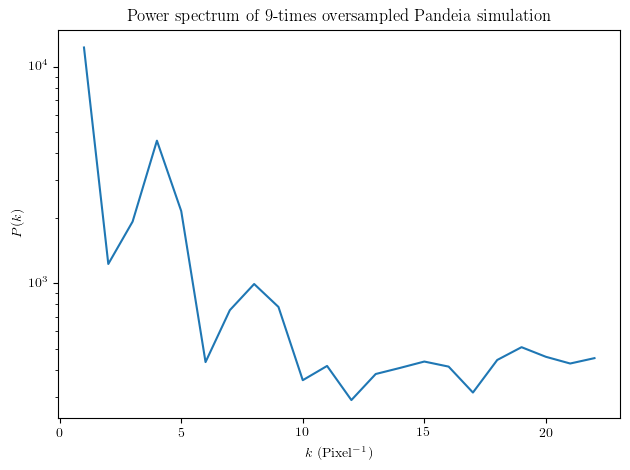

In [40]:
plt.plot(kvals, Abins)
plt.title('Power spectrum of 9-times oversampled Pandeia simulation')
plt.xlabel("$k$ (Pixel$^{-1})$")
plt.ylabel("$P(k)$")
# plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

plt.show()

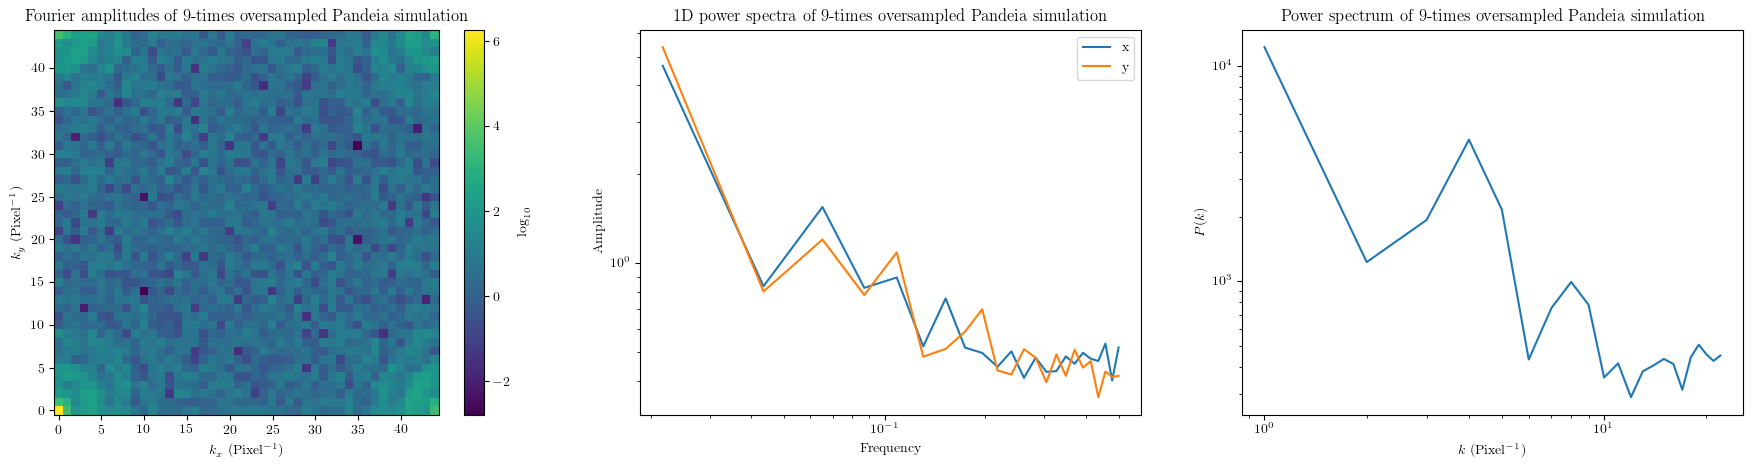

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22,5))

ax0 = ax[0].imshow(np.log10(fourier_amplitudes))
ax1 = ax[1].plot(fx[1:],x[1:], label='x')
ax[1].plot(fy[1:],y[1:], label='y')
ax2 = ax[2].plot(kvals, Abins)

ax[0].set_title('Fourier amplitudes of 9-times oversampled Pandeia simulation')
ax[1].set_title('1D power spectra of 9-times oversampled Pandeia simulation')
ax[2].set_title('Power spectrum of 9-times oversampled Pandeia simulation')

cbar = plt.colorbar(ax0, ax=ax[0])
cbar.set_label('$\log_{10}$')
ax[0].set_xlabel('$k_x$ (Pixel$^{-1}$)')
ax[0].set_ylabel('$k_y$ (Pixel$^{-1}$)')

ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()

ax[2].set_xlabel("$k$ (Pixel$^{-1})$")
ax[2].set_ylabel("$P(k)$")
ax[2].set_xscale('log')
ax[2].set_yscale('log')

plt.show()